In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataFrame = pd.read_csv("data_frame.csv")

In [4]:
import findspark
findspark.init("C:\spark")
import pyspark
from pyspark.sql import SparkSession
from pyspark.conf import SparkConf
from pyspark import SparkContext

In [5]:
spark = SparkSession.builder \
.master("local") \
.appName("pyspark_proje2") \
.getOrCreate()

In [6]:
dfSpark = spark.createDataFrame(dataFrame)

C:\spark\python\pyspark\sql\pandas\conversion.py:485: FutureWarning: is_datetime64tz_dtype is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.DatetimeTZDtype)` instead.
  if should_localize and is_datetime64tz_dtype(s.dtype) and s.dt.tz is not None:


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

u = dataFrame[['Product_Cost']]
i = dataFrame['Product_Price']
u_train, u_test, i_train, i_test = train_test_split(u, i, test_size=0.2, random_state=42)


linear_model = LinearRegression()
random_forest_model = RandomForestRegressor()
decision_tree_model = DecisionTreeRegressor()


linear_model.fit(u_train, i_train)
random_forest_model.fit(u_train, i_train)
decision_tree_model.fit(u_train, i_train)

# Tahmin
i_pred_linear = linear_model.predict(u_test)
i_pred_random_forest = random_forest_model.predict(u_test)
i_pred_decision_tree = decision_tree_model.predict(u_test)

# metriklerin hesaplanması (r2, ortalama mutlak ve ortalama kare)
r2_linear = r2_score(i_test, i_pred_linear)
mae_linear = mean_absolute_error(i_test, i_pred_linear)
mse_linear = mean_squared_error(i_test, i_pred_linear)


r2_random_forest = r2_score(i_test, i_pred_random_forest)
mae_random_forest = mean_absolute_error(i_test, i_pred_random_forest)
mse_random_forest = mean_squared_error(i_test, i_pred_random_forest)


r2_decision_tree = r2_score(i_test, i_pred_decision_tree)
mae_decision_tree = mean_absolute_error(i_test, i_pred_decision_tree)
mse_decision_tree = mean_squared_error(i_test, i_pred_decision_tree)


print("Linear Regression:")
print(f'R²: {r2_linear}\nMAE: {mae_linear}\nMSE: {mse_linear}\n')

print("Random Forest Regression:")
print(f'R²: {r2_random_forest}\nMAE: {mae_random_forest}\nMSE: {mse_random_forest}\n')

print("Decision Tree Regression:")
print(f'R²: {r2_decision_tree}\nMAE: {mae_decision_tree}\nMSE: {mse_decision_tree}\n')



Linear Regression:
R²: 0.9252922137061343
MAE: 1.857260185540376
MSE: 5.637185258056676

Random Forest Regression:
R²: 0.9663844923624528
MAE: 1.0744941204235703
MSE: 2.536507283873736

Decision Tree Regression:
R²: 0.9663845794572864
MAE: 1.0745489328841928
MSE: 2.5365007120057137



In [8]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression, RandomForestRegressor, DecisionTreeRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import SparkSession

# özellik vektörü oluşturma
assembler = VectorAssembler(inputCols=["Product_Cost"], outputCol="features_temp")
dfSpark = assembler.transform(dfSpark).drop("features").withColumnRenamed("features_temp", "features")


dfSpark_train, dfSpark_test = dfSpark.randomSplit([0.8, 0.2], seed=42)


linear_model_spark = LinearRegression(featuresCol="features", labelCol="Product_Price")
random_forest_model_spark = RandomForestRegressor(featuresCol="features", labelCol="Product_Price")
decision_tree_model_spark = DecisionTreeRegressor(featuresCol="features", labelCol="Product_Price")


linear_model_spark = linear_model_spark.fit(dfSpark_train)
random_forest_model_spark = random_forest_model_spark.fit(dfSpark_train)
decision_tree_model_spark = decision_tree_model_spark.fit(dfSpark_train)


predictions_linear_spark = linear_model_spark.transform(dfSpark_test)
predictions_random_forest_spark = random_forest_model_spark.transform(dfSpark_test)
predictions_decision_tree_spark = decision_tree_model_spark.transform(dfSpark_test)

# metrik hesaplamaları
evaluator = RegressionEvaluator(labelCol="Product_Price", predictionCol="prediction", metricName="r2")
evaluator_mae = RegressionEvaluator(labelCol="Product_Price", predictionCol="prediction", metricName="mae")
evaluator_mse = RegressionEvaluator(labelCol="Product_Price", predictionCol="prediction", metricName="mse")

r2_linear_spark = evaluator.evaluate(predictions_linear_spark)
mae_linear_spark = evaluator_mae.evaluate(predictions_linear_spark)
mse_linear_spark = evaluator_mse.evaluate(predictions_linear_spark)


r2_random_forest_spark = evaluator.evaluate(predictions_random_forest_spark)
mae_random_forest_spark = evaluator_mae.evaluate(predictions_random_forest_spark)
mse_random_forest_spark = evaluator_mse.evaluate(predictions_random_forest_spark)


r2_decision_tree_spark = evaluator.evaluate(predictions_decision_tree_spark)
mae_decision_tree_spark = evaluator_mae.evaluate(predictions_decision_tree_spark)
mse_decision_tree_spark = evaluator_mse.evaluate(predictions_decision_tree_spark)


print("Linear Regression (Spark):")
print(f'R²: {r2_linear_spark}\nMAE: {mae_linear_spark}\nMSE: {mse_linear_spark}\n')

print("Random Forest Regression (Spark):")
print(f'R²: {r2_random_forest_spark}\nMAE: {mae_random_forest_spark}\nMSE: {mse_random_forest_spark}\n')

print("Decision Tree Regression (Spark):")
print(f'R²: {r2_decision_tree_spark}\nMAE: {mae_decision_tree_spark}\nMSE: {mse_decision_tree_spark}\n')


Linear Regression (Spark):
R²: 0.9251582548134343
MAE: 1.8558052267298017
MSE: 5.641831403987552

Random Forest Regression (Spark):
R²: 0.9639728258611096
MAE: 1.1643539725290468
MSE: 2.7158538586591616

Decision Tree Regression (Spark):
R²: 0.9639727286547332
MAE: 1.1644099790122329
MSE: 2.715861186414354



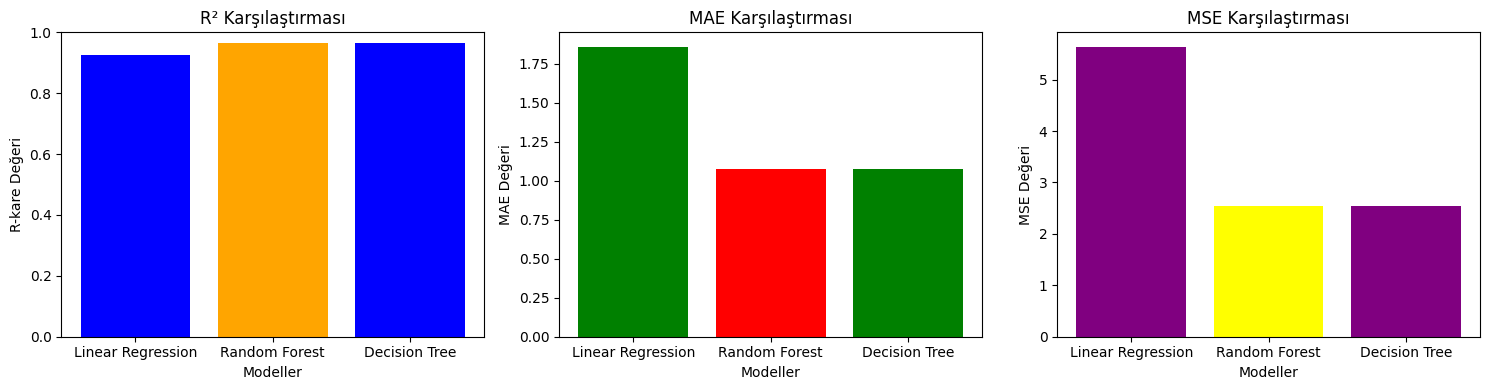

In [9]:
# sklearn ile yapılan tahminlerin model kıyaslaması

models_sklearn = ['Linear Regression', 'Random Forest', 'Decision Tree']
r2_values_sklearn = [r2_linear, r2_random_forest, r2_decision_tree]
mae_values_sklearn = [mae_linear, mae_random_forest, mae_decision_tree]
mse_values_sklearn = [mse_linear, mse_random_forest, mse_decision_tree]


plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(models_sklearn, r2_values_sklearn, color=['blue', 'orange'])
plt.xlabel('Modeller')
plt.ylabel('R-kare Değeri')
plt.title('R² Karşılaştırması')
plt.ylim(0, 1)


plt.subplot(1, 3, 2)
plt.bar(models_sklearn, mae_values_sklearn, color=['green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('MAE Değeri')
plt.title('MAE Karşılaştırması')


plt.subplot(1, 3, 3)
plt.bar(models_sklearn, mse_values_sklearn, color=['purple', 'yellow'])
plt.xlabel('Modeller')
plt.ylabel('MSE Değeri')
plt.title('MSE Karşılaştırması')

plt.tight_layout()
plt.show()

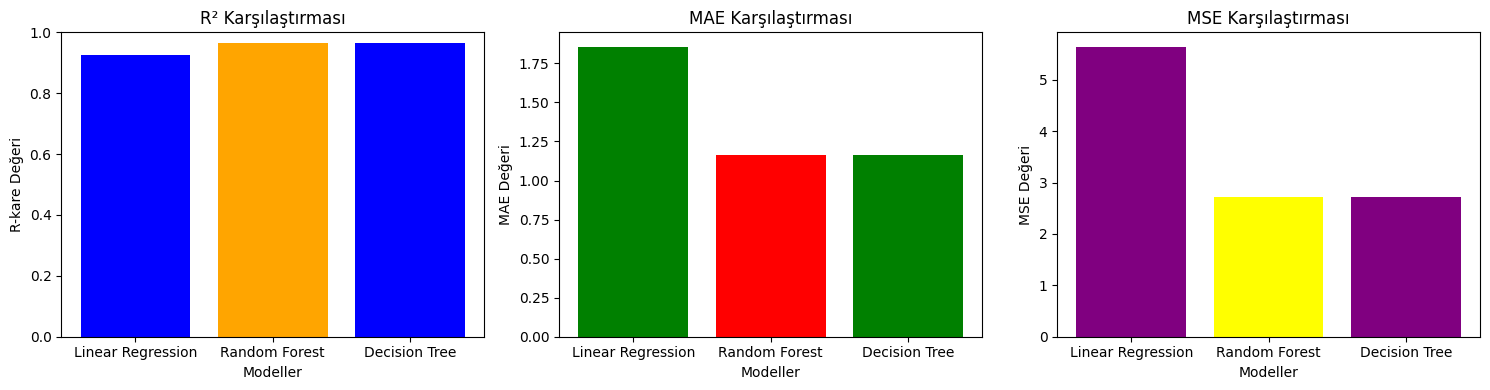

In [10]:
# spark ile yapılan tahminlerin model kıyaslaması
models_spark = ['Linear Regression', 'Random Forest', 'Decision Tree']
r2_values_spark = [r2_linear_spark, r2_random_forest_spark, r2_decision_tree_spark]
mae_values_spark = [mae_linear_spark, mae_random_forest_spark, mae_decision_tree_spark]
mse_values_spark = [mse_linear_spark, mse_random_forest_spark, mse_decision_tree_spark]

# R2 Karşılaştırması
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(models_spark, r2_values_spark, color=['blue', 'orange'])
plt.xlabel('Modeller')
plt.ylabel('R-kare Değeri')
plt.title('R² Karşılaştırması')
plt.ylim(0, 1)

# MAE Karşılaştırması
plt.subplot(1, 3, 2)
plt.bar(models_spark, mae_values_spark, color=['green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('MAE Değeri')
plt.title('MAE Karşılaştırması')

# MSE Karşılaştırması
plt.subplot(1, 3, 3)
plt.bar(models_spark, mse_values_spark, color=['purple', 'yellow'])
plt.xlabel('Modeller')
plt.ylabel('MSE Değeri')
plt.title('MSE Karşılaştırması')

plt.tight_layout()
plt.show()

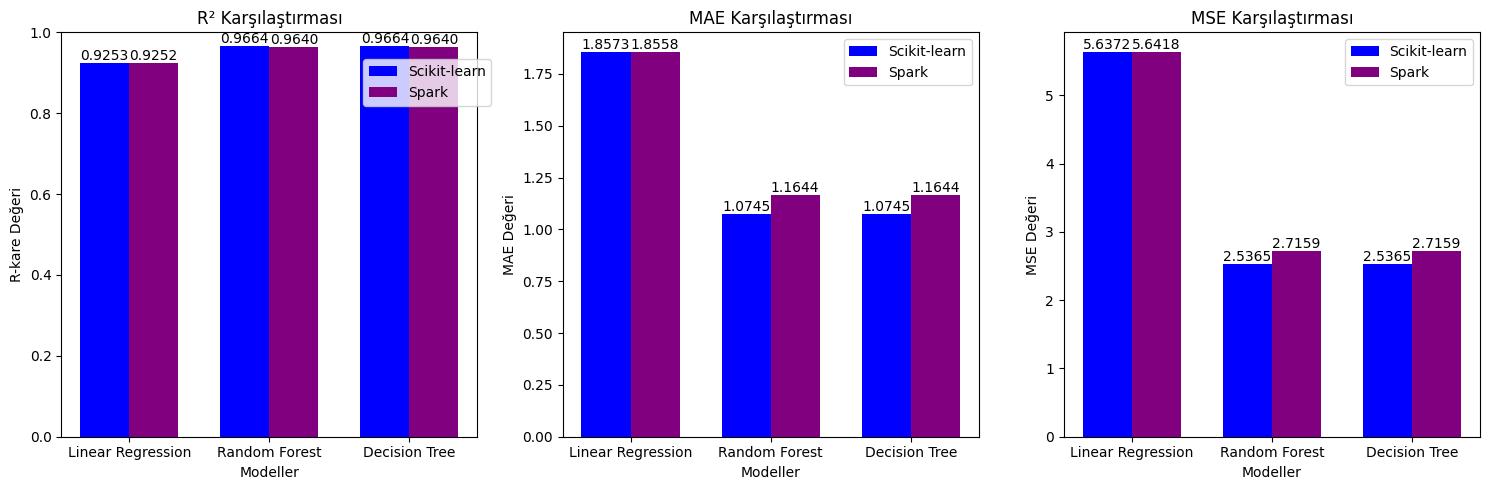

In [11]:
# Scikit-learn verileri
models = ['Linear Regression', 'Random Forest', 'Decision Tree']
r2_values_sklearn = [r2_linear, r2_random_forest, r2_decision_tree]
mae_values_sklearn = [mae_linear, mae_random_forest, mae_decision_tree]
mse_values_sklearn = [mse_linear, mse_random_forest, mse_decision_tree]

# Spark verileri
r2_values_spark = [r2_linear_spark, r2_random_forest_spark, r2_decision_tree_spark]
mae_values_spark = [mae_linear_spark, mae_random_forest_spark, mae_decision_tree_spark]
mse_values_spark = [mse_linear_spark, mse_random_forest_spark, mse_decision_tree_spark]

bar_width = 0.35
index = np.arange(len(models)) 

# R2 Karşılaştırması
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
bars_sklearn = plt.bar(index - bar_width/2, r2_values_sklearn, bar_width, color='blue', label='Scikit-learn')
bars_spark = plt.bar(index + bar_width/2, r2_values_spark, bar_width, color='purple', label='Spark')
plt.xlabel('Modeller')
plt.ylabel('R-kare Değeri')
plt.title('R² Karşılaştırması')
plt.ylim(0, 1)
plt.xticks(index, models)
plt.legend(bbox_to_anchor=(1.05, 0.95), loc='upper right')

# Sayısal değerleri gösterme
for bar in bars_sklearn:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

for bar in bars_spark:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

# MAE Karşılaştırması
plt.subplot(1, 3, 2)
bars_sklearn = plt.bar(index - bar_width/2, mae_values_sklearn, bar_width, color='blue', label='Scikit-learn')
bars_spark = plt.bar(index + bar_width/2, mae_values_spark, bar_width, color='purple', label='Spark')
plt.xlabel('Modeller')
plt.ylabel('MAE Değeri')
plt.title('MAE Karşılaştırması')
plt.xticks(index, models)
plt.legend()

# Sayısal değerleri gösterme
for bar in bars_sklearn:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

for bar in bars_spark:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

# MSE Karşılaştırması
plt.subplot(1, 3, 3)
bars_sklearn = plt.bar(index - bar_width/2, mse_values_sklearn, bar_width, color='blue', label='Scikit-learn')
bars_spark = plt.bar(index + bar_width/2, mse_values_spark, bar_width, color='purple', label='Spark')
plt.xlabel('Modeller')
plt.ylabel('MSE Değeri')
plt.title('MSE Karşılaştırması')
plt.xticks(index, models)
plt.legend()

# Sayısal değerleri gösterme
for bar in bars_sklearn:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

for bar in bars_spark:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, '{:.4f}'.format(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


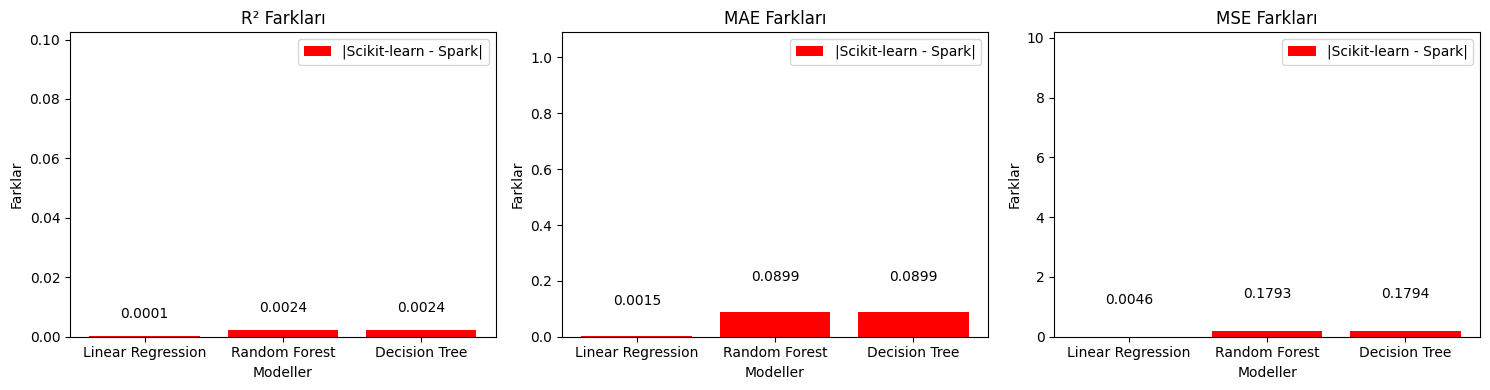

In [12]:

# Scikit-learn verileri
models_sklearn = ['Linear Regression', 'Random Forest', 'Decision Tree']
r2_values_sklearn = [r2_linear, r2_random_forest, r2_decision_tree]
mae_values_sklearn = [mae_linear, mae_random_forest, mae_decision_tree]
mse_values_sklearn = [mse_linear, mse_random_forest, mse_decision_tree]

# Spark verileri
models_spark = ['Linear Regression', 'Random Forest', 'Decision Tree']
r2_values_spark = [r2_linear_spark, r2_random_forest_spark, r2_decision_tree_spark]
mae_values_spark = [mae_linear_spark, mae_random_forest_spark, mae_decision_tree_spark]
mse_values_spark = [mse_linear_spark, mse_random_forest_spark, mse_decision_tree_spark]

# Farklar
r2_diff = np.abs(np.array(r2_values_sklearn) - np.array(r2_values_spark))
mae_diff = np.abs(np.array(mae_values_sklearn) - np.array(mae_values_spark))
mse_diff = np.abs(np.array(mse_values_sklearn) - np.array(mse_values_spark))

# Sayısal farkları ekleyelim
r2_labels = [f"{r2_diff[i]:.4f}" for i in range(len(r2_diff))]
mae_labels = [f"{mae_diff[i]:.4f}" for i in range(len(mae_diff))]
mse_labels = [f"{mse_diff[i]:.4f}" for i in range(len(mse_diff))]

# R2 Karşılaştırması
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.bar(models_sklearn, r2_diff, color='red', label='|Scikit-learn - Spark|')
plt.xlabel('Modeller')
plt.ylabel('Farklar')
plt.title('R² Farkları')
for i, value in enumerate(r2_labels):
    plt.text(i, r2_diff[i] + 0.005, value, ha='center', va='bottom')
plt.ylim(0, max(r2_diff) + 0.1)
plt.legend()

# MAE Karşılaştırması
plt.subplot(1, 3, 2)
plt.bar(models_sklearn, mae_diff, color='red', label='|Scikit-learn - Spark|')
plt.xlabel('Modeller')
plt.ylabel('Farklar')
plt.title('MAE Farkları')
for i, value in enumerate(mae_labels):
    plt.text(i, mae_diff[i] + 0.1, value, ha='center', va='bottom')
plt.ylim(0, max(mae_diff) + 1)
plt.legend()

# MSE Karşılaştırması
plt.subplot(1, 3, 3)
plt.bar(models_sklearn, mse_diff, color='red', label='|Scikit-learn - Spark|')
plt.xlabel('Modeller')
plt.ylabel('Farklar')
plt.title('MSE Farkları')
for i, value in enumerate(mse_labels):
    plt.text(i, mse_diff[i] + 1, value, ha='center', va='bottom')
plt.ylim(0, max(mse_diff) + 10)
plt.legend()

plt.tight_layout()
plt.show()
